### 导入工具库和数据

In [157]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rc('font', size=14)
import seaborn as sns
sns.set(style='whitegrid', color_codes=True)

In [158]:
df = pd.read_csv('titanic_data.csv')
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S


In [159]:
print('数据集中包含的数据个数: {}'.format(df.shape[0]))

数据集中包含的数据个数: 1310


### 处理缺失数据

In [160]:
df.isnull().sum()
# 年龄和仓位缺失的数据较多

pclass         1
survived       1
name           1
sex            1
age          264
sibsp          1
parch          1
ticket         1
fare           2
cabin       1015
embarked       3
dtype: int64

In [161]:
print('年龄缺失的百分比: {:.2f}%'.format(df['age'].isnull().sum() / df.shape[0] * 100))

年龄缺失的百分比: 20.15%


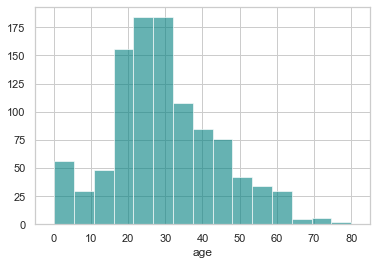

In [162]:
ax = df['age'].hist(bins=15, color='teal', alpha=.6)
ax.set(xlabel='age')
plt.xlim(-5, 85)
plt.show()
# 年龄的分布偏左，使用中位数替换缺失值比使用均值合适

In [163]:
print('年龄的均值为: {:.2f}'.format(df['age'].mean(skipna=True)))
print('年龄的中值为: {:.2f}'.format(df['age'].median(skipna=True)))

年龄的均值为: 29.88%
年龄的中值为: 28.00%


In [164]:
print('仓位缺失的百分比: {:.2f}%'.format(df['cabin'].isnull().sum() / df.shape[0] * 100))
# 缺失值太多，直接丢弃这个特征

仓位缺失的百分比: 77.48%


In [165]:
print('登船地点缺失的百分比: {:.2f}%'.format(df['embarked'].isnull().sum() / df.shape[0] * 100))

登船地点缺失的百分比: 0.23%


按照登船地点分组 (C = Cherbourg, Q = Queenstown, S = Southampton)
S    914
C    270
Q    123
Name: embarked, dtype: int64


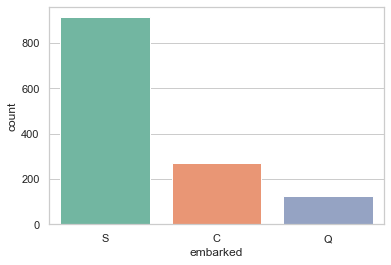

In [166]:
print('按照登船地点分组 (C = Cherbourg, Q = Queenstown, S = Southampton)')
print(df['embarked'].value_counts())
sns.countplot(x='embarked', data=df, palette='Set2')
plt.show()
# 大部分在南安普顿登船，可用于替换缺失值

In [167]:
print('乘客登船地点的众数为: {}'.format(df['embarked'].value_counts().idxmax()))

乘客登船地点的众数为: S


In [168]:
data = df.copy()
data['age'].fillna(df['age'].median(skipna=True), inplace=True)
# 替换缺失值
data['embarked'].fillna(df['embarked'].value_counts().idxmax(), inplace=True)
data.drop('cabin', axis=1, inplace=True)

In [169]:
data.isnull().sum()

pclass      1
survived    1
name        1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        2
embarked    0
dtype: int64

In [170]:
data.dropna(inplace=True)
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

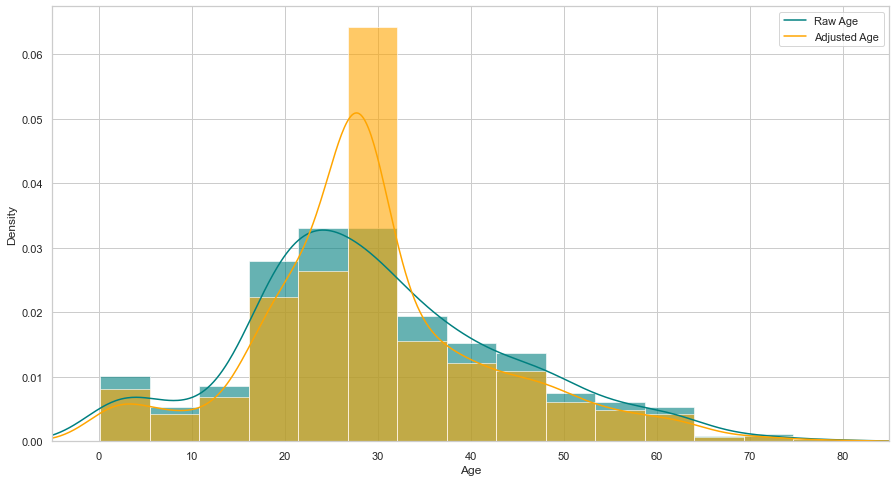

In [171]:
plt.figure(figsize=(15, 8))
ax = df['age'].hist(bins=15, density=True, stacked=True, color='teal', alpha=.6)
df['age'].plot(kind='density', color='teal')
ax = data['age'].hist(bins=15, density=True, stacked=True, color='orange', alpha=.6)
data['age'].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-5, 85)
plt.show()

In [172]:
# 'sibsp'(一同登船的兄弟姐妹或配偶数量)和'parch'(一同登船的父母或子女数量)都代表是否有同伴同行。
# 为避免多重共线性，将这两个特征转为一个特征
data['travel_alone'] = np.where((data['sibsp'] + data['parch']) > 0, 0, 1)
data.drop('sibsp', axis=1, inplace=True)
data.drop('parch', axis=1, inplace=True)

In [173]:
final = pd.get_dummies(data, columns=['embarked', 'sex'])
final.drop('name', axis=1, inplace=True)
final.drop('ticket', axis=1, inplace=True)

final.head()

,pclass,survived,age,fare,travel_alone,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1.0,1.0,29.0000,211.3375,1,0,0,1,1,0
1,1.0,1.0,0.9167,151.5500,0,0,0,1,0,1
2,1.0,0.0,2.0000,151.5500,0,0,0,1,1,0
3,1.0,0.0,30.0000,151.5500,0,0,0,1,0,1
4,1.0,0.0,25.0000,151.5500,0,0,0,1,1,0


### 观察数据

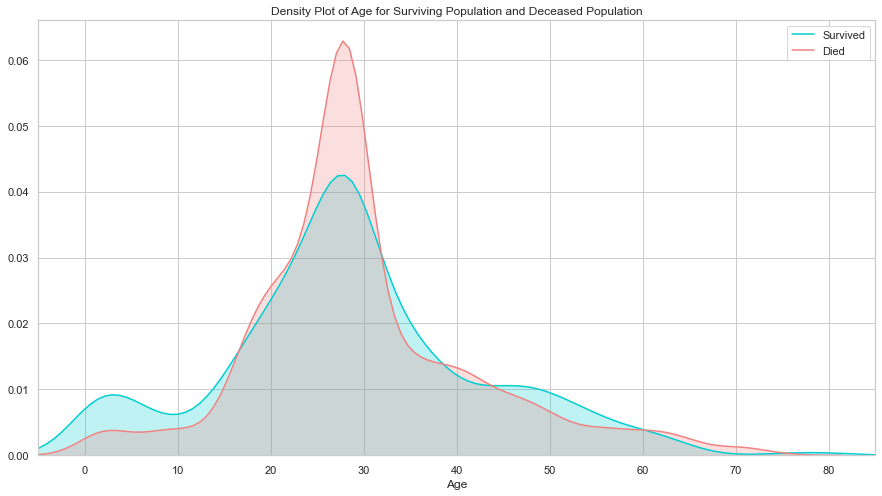

In [174]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final['age'][final.survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(final['age'][final.survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-5, 85)
plt.show()

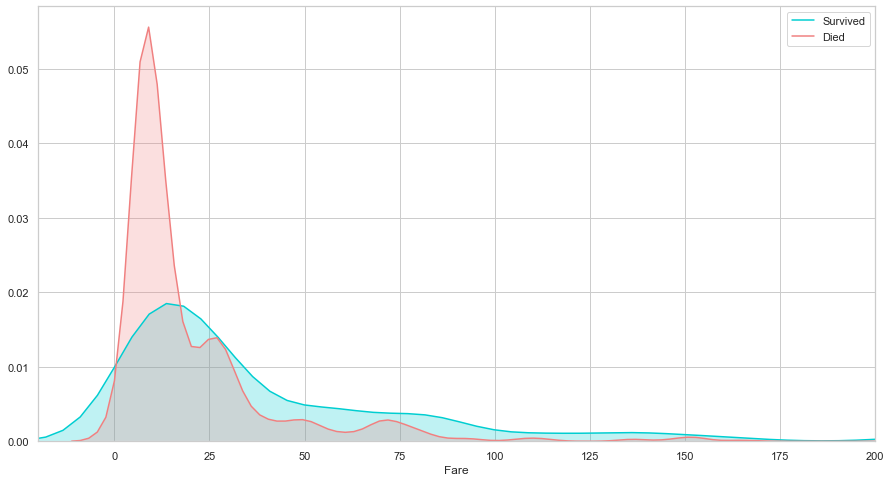

In [175]:
plt.figure(figsize=(15, 8))
ax = sns.kdeplot(final['fare'][final.survived == 1], color='darkturquoise', shade=True)
sns.kdeplot(final['fare'][final.survived == 0], color='lightcoral', shade=True)
plt.legend(['Survived', 'Died'])
ax.set(xlabel='Fare')
plt.xlim(-20, 200)
plt.show()

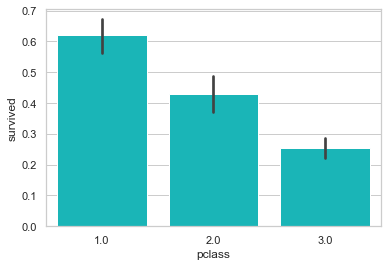

In [176]:
sns.barplot('pclass', 'survived', data=df, color='darkturquoise')
plt.show()

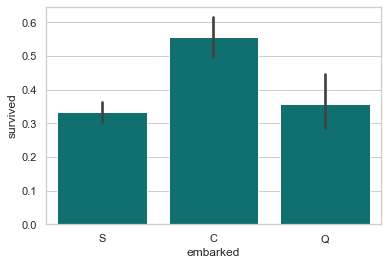

In [177]:
sns.barplot('embarked', 'survived', data=df, color='teal')
plt.show()

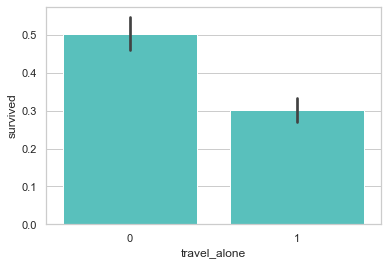

In [178]:
sns.barplot('travel_alone', 'survived', data=final, color='mediumturquoise')
plt.show()

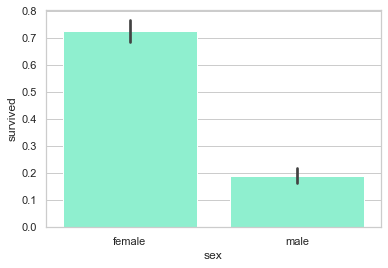

In [179]:
sns.barplot('sex', 'survived', data=df, color='aquamarine')
plt.show()

### 用逻辑回归做预测

In [180]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cols = ['age', 'fare', 'travel_alone', 'pclass', 'embarked_C', 'embarked_S', 'sex_male']
X = final[cols]
y = final['survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print('准确率为: {:.2f}'.format(accuracy_score(y_test, y_pred)))


准确率为: 0.79


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
